# Coronavirus Tweets- Text Sentiment Analyis & Topic Modeling

- Member 1: Vanessa Aispuro
- Member 2: Elysa Alamillo
- Member 3: Jaime Gomez

# Introduction

The coronavirus is for many a thing of the past. As we all move forward with our lives we remember the multiple lockdowns, the fear in many for our loved ones and ourselves. But more interesting social phenonomens were at play as well like a toliet paper and hand sanitizer outbreak, being isolated in our homes, banter over mask wearing and so much more. This python project analyzes the public's reactions on Twitterabout a week before the shutdown in the United States to about a week after the shut down took place through public tweets. 

Sentiment analysis provides a clear image of the sentimental polarity through comments and compares the variations across various issues, making it a useful tool for reputation management, targeted marketing efforts, and competitive analysis. As a result, we decided to apply such to our data on public Twitter users' tweets surrounding the Coronavirus. Second, we used topic modeling to understand the themes surrounding Covid 19. Topic modeling is a technique used to automatically spot trends and classify related documents according to their content. This allows us to develop a better understanding of the mindset of the population in the United States during a time of crisis.  

#### The tweets have been pulled from Twitter and manual tagging has been done then. We've been given codes for names and usernames to avoid any privacy concerns.

![Image Description](IMG_2120.JPG)

# Research Questions  

#### 1. What are the specific aspects or topics that elicit positive or negative sentiment? 
#### 2. How did the themes around Coronavirus evolve throughout the pandemic?

# Dataset Description

##### In this project we analyze the data called “Corona_NLP_test.csv”. The data set consists of 7 columns; the predominant columns that  interest us during our project are TweetAt, TweetOriginal and Sentiment1. TweetAt represents the timestamp of each tweet from March, 2,2020 - March 16,2020. TweetOriginal is the column for the Twitter Tweets consisting of out 3798 tweets related to COVID19. The dataset is directly off Kaggle, a collection of public datasets, where a collection of twitter user IDs, a predetermined sentiment, and ultimately tweets from the relevant twitter users are all included. The users' opinions and thoughts on Coronavirus, symptoms, masking, and particular environments are expressed in these tweets. These opinions vary from positive to negative to neutral thoughts. 

In [11]:
!pip install nltk 
!pip install -U textblob

In [12]:
!pip install textblob

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

In [14]:
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [16]:
import pandas as pd
df = pd.read_csv('Corona_NLP_test.csv')

In [17]:
print(df)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Fin

In [18]:
df.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('Corona_NLP_test.csv')

In [21]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('Corona_NLP_test.csv')

In [26]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#', '', text)
    return text.strip()

df['clean_text'] = df['OriginalTweet'].apply(clean_text)

In [27]:
df["OriginalTweet"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [28]:
df["clean_text"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as coronavirus-fearing shoppers stock up'

In [29]:
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']


In [30]:
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)
df[["clean_text", "sentiment_textblob"]]

,clean_text,sentiment_textblob
0,TRENDING: New Yorkers encounter empty supermar...,Positive
1,When I couldn't find hand sanitizer at Fred Me...,Neutral
2,Find out how you can protect yourself and love...,Positive
3,Panic buying hits NewYork City as anxious shop...,Positive
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Positive
3795,Asst Prof of Economics was on talking about ...,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative


In [31]:
df['sent_textblob_cont'] = df['clean_text'].apply(get_sent_textblob_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont
0,TRENDING: New Yorkers encounter empty supermar...,Positive,0.018182
1,When I couldn't find hand sanitizer at Fred Me...,Neutral,0.000000
2,Find out how you can protect yourself and love...,Positive,0.700000
3,Panic buying hits NewYork City as anxious shop...,Positive,0.075000
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative,-0.016667
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,0.227273
3794,Did you panic buy a lot of non-perishable item...,Positive,0.500000
3795,Asst Prof of Economics was on talking about ...,Neutral,0.000000
3796,Gov need to do somethings instead of biar je r...,Negative,-1.000000


In [155]:
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)
df[["clean_text", "sentiment_textblob", "sentiment_vader"]]

KeyError: 'clean_text'

In [47]:
df['sent_vader_cont'] = df['clean_text'].apply(get_sent_vader_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,TRENDING: New Yorkers encounter empty supermar...,Positive,0.018182,Negative,-0.2023
1,When I couldn't find hand sanitizer at Fred Me...,Neutral,0.000000,Negative,-0.3417
2,Find out how you can protect yourself and love...,Positive,0.700000,Positive,0.7579
3,Panic buying hits NewYork City as anxious shop...,Positive,0.075000,Negative,-0.6486
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative,-0.016667,Neutral,0.0000
...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,0.227273,Positive,0.5574
3794,Did you panic buy a lot of non-perishable item...,Positive,0.500000,Negative,-0.2500
3795,Asst Prof of Economics was on talking about ...,Neutral,0.000000,Neutral,0.0000
3796,Gov need to do somethings instead of biar je r...,Negative,-1.000000,Negative,-0.8205


In [48]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING: New Yorkers encounter empty supermar...,Positive,0.018182,Negative,-0.2023
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn't find hand sanitizer at Fred Me...,Neutral,0.000000,Negative,-0.3417
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...,Positive,0.700000,Positive,0.7579
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Panic buying hits NewYork City as anxious shop...,Positive,0.075000,Negative,-0.6486
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,Negative,-0.016667,Neutral,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...,Positive,0.227273,Positive,0.5574
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...,Positive,0.500000,Negative,-0.2500
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,Asst Prof of Economics was on talking about ...,Neutral,0.000000,Neutral,0.0000
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...,Negative,-1.000000,Negative,-0.8205


In [49]:
print(df.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'clean_text', 'sentiment_textblob', 'sent_textblob_cont',
       'sentiment_vader', 'sent_vader_cont'],
      dtype='object')


# Research Question 2 

In [60]:
import pandas as pd 

In [61]:
df = pd.read_csv('Corona_NLP_test.csv') ## Upload the File

In [62]:
print(df)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Fin

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [65]:
!pip install nltk

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
import re
import html

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = ['to', 'etc', 'and', 'of', 'in', 'the', 'for', 'is', 'you', 'are', 'on', 'at', 'it', 'this', 'that', 'up', 'be', 'have', 'all', 'with', 'amp', 'or', 'as', 'from', 'just', 'so', 'but', 'about', 'what', 'their', 'there', 'has', 'don', 'more', 'who', 'was', 'do', 'by', 'some', 'how', 're', 'because']
##stemming was cutting out alot of words like different variations of covid but i still needed the above words cut so this was my solution 
stop_words.update(additional_stopwords)
stemmer = PorterStemmer()
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove RT (retweet sign)
    text = re.sub(r'rt[\s]+', '', text)
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    # Remove all non-alphabetic characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove leading and trailing whitespaces
    text = text.strip()
    text = " ".join([i for i in text.split() if i.lower() not in stop_words])
    
    return text

df['text_cleaned'] = df['OriginalTweet'].apply(preprocess_text)

print(df['text_cleaned'])

0       trending new yorkers encounter empty supermark...
1       find hand sanitizer fred meyer turned amazon 1...
2                     find protect loved ones coronavirus
3       panic buying hits newyork city anxious shopper...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot non perishable items echo needs ...
3795    asst prof economics talking recent research co...
3796    gov need somethings instead biar je rakyat ass...
3797    members committed safety employees end users m...
Name: text_cleaned, Length: 3798, dtype: object


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
documents = df['text_cleaned']
from datetime import datetime, timedelta  ## after creating the hypothesis I realized that the data was actually of only two weeks so I wanted to compare the topics over two weeks 

df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       3798 non-null   int64         
 1   ScreenName     3798 non-null   int64         
 2   Location       2964 non-null   object        
 3   TweetAt        3798 non-null   datetime64[ns]
 4   OriginalTweet  3798 non-null   object        
 5   Sentiment      3798 non-null   object        
 6   text_cleaned   3798 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 207.8+ KB


In [69]:
# Define the start and end dates for week 1 making sure to only use the clean we text over Original Text
week1_start = pd.to_datetime('2020-03-02', format='%Y-%m-%d')
week1_end = pd.to_datetime('2020-03-07', format='%Y-%m-%d')


# Filter the DataFrame for week 1 data
week1_df = df[(df['TweetAt'] >= week1_start) & (df['TweetAt'] <= week1_end)]

week1_text_data = week1_df['text_cleaned'].astype(str)


print(week1_text_data)


0     trending new yorkers encounter empty supermark...
1     find hand sanitizer fred meyer turned amazon 1...
2                   find protect loved ones coronavirus
3     panic buying hits newyork city anxious shopper...
4     toiletpaper dunnypaper coronavirus coronavirus...
5     remember last time paid 2 99 gallon regular ga...
6     voting age coronavirus hand sanitizer supertue...
7     stop covid19 without protecting healthworkers ...
8     hi twitter pharmacist sell hand sanitizer livi...
9     anyone supermarket last days went normal shop ...
10    best quality couches unbelievably low prices a...
11    beware counterfeits trying sell fake masks che...
12    panic food buying germany due coronavirus begu...
13    covid_19 went grocery store turns cleaning sup...
14    busy watching election returns bracing covid 1...
15    airsewa providing webchecin customers free sea...
16    precautionary measures taken respective restau...
17    stockpiling food supplies buy extra local 

In [70]:
num_rows = week1_df.shape[0] ## I checked the days matched so I wasnt leaving any tweets out
print("Number of rows in week1_df:", num_rows)

Number of rows in week1_df: 31


In [71]:
# Define the start and end dates for week 2
week2_start = pd.to_datetime('2020-03-08', format='%Y-%m-%d')
week2_end = pd.to_datetime('2020-03-17', format='%Y-%m-%d')


# Filter the DataFrame for week 1 data
week2_df = df[(df['TweetAt'] >= week2_start) & (df['TweetAt'] <= week2_end)]

week2_text_data = week2_df['text_cleaned'].astype(str)


print(week2_text_data)

31      tip pro wrestlers help combat coronavirus like...
32      effective necessary optics scare tactics ameri...
33      imho russia rug pull oil prices designed end d...
34      due brexit gt gt supermarkets begin foodration...
35      remember media deflection stories bog rolls pa...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot non perishable items echo needs ...
3795    asst prof economics talking recent research co...
3796    gov need somethings instead biar je rakyat ass...
3797    members committed safety employees end users m...
Name: text_cleaned, Length: 3767, dtype: object


In [72]:
from nltk import FreqDist
## I didn't want my code to based on the thousands of words but only more frequent words

# Tokenize the text into individual words
week1_tokens = week1_text_data.str.split().explode().tolist()
week2_tokens = week2_text_data.str.split().explode().tolist()

# Calculate word frequencies for week 1 and week 2
frequent_words_week1 = FreqDist(week1_tokens)
frequent_words_week2 = FreqDist(week2_tokens)
# Get the most frequent words
top_frequent_words_week1 = frequent_words_week1.most_common()
top_frequent_words_week2 = frequent_words_week2.most_common()

column_width = 25

# Print the most frequent words for week 1
print("Week 1 - Most Frequent Words:")
for word, count in top_frequent_words_week1:
    print(f"{word:{column_width}} {count}")

Week 1 - Most Frequent Words:
coronavirus               25
prices                    10
food                      8
panic                     7
buying                    6
covid_19                  6
covid                     6
sold                      5
sanitizer                 5
19                        5
hand                      4
costco                    4
last                      4
masks                     4
free                      4
many                      4
supermarket               3
stock                     3
supplies                  3
gas                       3
covid19                   3
sell                      3
like                      3
people                    3
taken                     3
grocery                   3
consumer                  3
safety                    3
seats                     3
month                     3
may                       3
facemasks                 3
new                       2
empty                     2
shelves         

In [73]:
# Print the most frequent words for week 2
print("Week 2 - Most Frequent Words:")
for word, count in top_frequent_words_week2:
    print(f"{word:{column_width}} {count}")

Week 2 - Most Frequent Words:
covid_19                  1535
coronavirus               1500
food                      1358
store                     1026
grocery                   820
19                        812
covid                     810
people                    794
stock                     791
shopping                  528
supermarket               517
online                    514
panic                     512
prices                    429
toilet                    366
need                      365
paper                     358
like                      333
get                       330
covid19                   303
buying                    301
go                        262
going                     261
please                    244
retail                    244
local                     240
time                      230
home                      228
us                        227
coronaviruspandemic       219
shelves                   213
buy                       211
stores

In [79]:
# I created a DTM so i could apply the LDA I gor most this info from DataCAmp

top_frequent_words_week1 = [word for word, count in top_frequent_words_week1]
vectorizer_week1 = CountVectorizer(vocabulary=top_frequent_words_week1)


# Create the document-term matrix
document_term_matrix_week1 = vectorizer_week1.fit_transform(week1_text_data)

# Convert the matrix to a DataFrame
dtm_df_week1 = pd.DataFrame(document_term_matrix_week1.toarray(), columns=top_frequent_words_week1)
document_word_counts_week1 = dtm_df_week1.sum(axis=1)
dtm_df_filtered_week1 = dtm_df_week1[document_word_counts_week1 > 0]

# Print the document-term matrix
print(dtm_df_filtered_week1)

    coronavirus  prices  food  panic  buying  covid_19  covid  sold  \
0             1       0     0      0       0         0      0     1   
1             1       1     0      0       0         0      0     0   
2             1       0     0      0       0         0      0     0   
3             1       0     1      1       1         0      0     0   
4             1       0     0      0       2         1      0     0   
5             1       2     0      0       0         0      0     0   
6             1       0     0      0       0         0      0     0   
7             1       1     0      0       0         0      0     0   
8             0       0     0      0       0         0      0     1   
9             0       0     0      0       0         1      0     0   
10            0       1     0      0       0         1      0     0   
11            1       1     0      0       0         1      0     0   
12            1       0     2      2       2         0      0     0   
13    

In [80]:
from sklearn.decomposition import LatentDirichletAllocation

number_topics = 2  # Number of topics
number_words = 15  # Number of words to display for each topic

# Initialize the LDA model
lda_model_week1 = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1)

# Fit the LDA model to the document-term matrix
lda_model_week1.fit(document_term_matrix_week1)

# Get the top words for each topic in week 1
for topic_idx, topic in enumerate(lda_model_week1.components_):
    top_words_indices = topic.argsort()[:-number_words - 1:-1]
    top_words = [dtm_df_filtered_week1.columns[index] for index in top_words_indices]
    print(f"\nTopic #{topic_idx+1}:")
    print(" ".join(top_words))


Topic #1:
coronavirus food many hand buying supplies seats stock grocery sanitizer supermarket consumer call need money

Topic #2:
coronavirus prices panic covid 19 sold covid_19 masks last costco like month sell facemasks buying


In [81]:
# Calculate the document word counts
document_word_counts_week1 = dtm_df_week1.sum(axis=1)

# Filter out documents with zero word counts
dtm_df_filtered_week1 = dtm_df_week1[document_word_counts_week1 > 0]

# Select only the columns corresponding to the top frequent words
dtm_df_filtered_week1 = dtm_df_filtered_week1[top_frequent_words_week1]

# Use dtm_df_filtered_week1 for further analysis

# Visualization

In [50]:
import matplotlib.pyplot as plt

keyword_scores = {'empty1': -0.2 , 'couldnt2': -0.3, 'protect2': 0.7, 'panic4': -0.6, 'toiletpaper5': 0.00}

In [51]:
positive_color = 'green'
negative_color = 'red'

In [52]:
positive_keywords = []
negative_keywords = []

for keyword, score in keyword_scores.items():
    if score > 0:
        positive_keywords.append((keyword, score))
    else:
        negative_keywords.append((keyword, score))

In [53]:
positive_keywords = sorted(positive_keywords, key=lambda x: x[1], reverse=True)
negative_keywords = sorted(negative_keywords, key=lambda x: x[1])

In [54]:
positive_labels = [kw[0] for kw in positive_keywords]
positive_scores = [kw[1] for kw in positive_keywords]
negative_labels = [kw[0] for kw in negative_keywords]
negative_scores = [kw[1] for kw in negative_keywords]

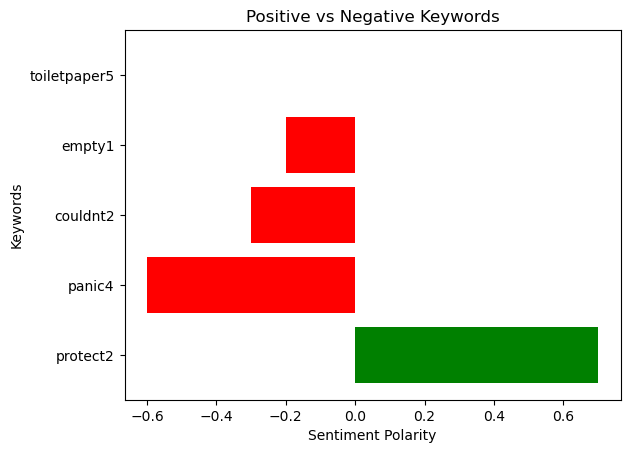

In [59]:
fig, ax = plt.subplots()

ax.barh(positive_labels, positive_scores, color=positive_color)
ax.barh(negative_labels, negative_scores, color=negative_color)

ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Keywords')
ax.set_title('Positive vs Negative Keywords')

plt.show()

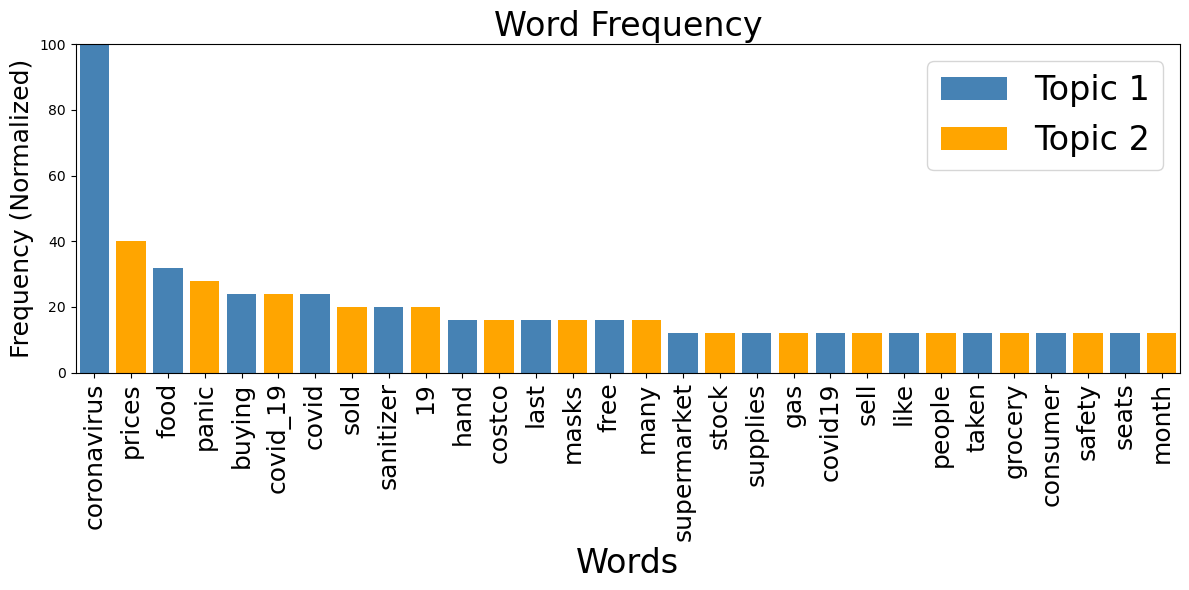

In [82]:
import matplotlib.pyplot as plt

# Get the top words and their frequencies
top_words = dtm_df_filtered_week1.columns[:30]  # Use only the first 30 words
word_frequencies = dtm_df_filtered_week1.sum()

# Normalize frequencies to percentage scale
word_frequencies_normalized = (word_frequencies / word_frequencies.max()) * 100

# Set up the bar graph
x = range(len(top_words))
y = word_frequencies_normalized[top_words]  # Select frequencies corresponding to top_words

# Define the colors for Topic 1 and Topic 2
colors = ['steelblue', 'orange']

# Define the legend labels for Topic 1 and Topic 2
legend_labels = ['Topic 1', 'Topic 2']

# Plot the bar graph with different colors for each topic
plt.figure(figsize=(12, 6))
for i, word in enumerate(top_words):
    plt.bar(x[i], y[i], color=colors[i % len(colors)])

# Set the x-axis labels and limits
plt.xticks(x, top_words, rotation='vertical', fontsize=18)
plt.xlim(-0.5, len(top_words) - 0.5)  # Adjust x-axis limits for clarity

# Add labels, title, and y-axis limit
plt.xlabel('Words', fontsize=24)
plt.ylabel('Frequency (Normalized)', fontsize=18)
plt.title('Word Frequency', fontsize=24)
plt.ylim(0, 100,)  # Set y-axis limit to 100%

# Add the legend
plt.legend(legend_labels, fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
num_rows = week2_df.shape[0] ## I checked the days matched so I wasnt leaving any tweets out
print("Number of rows in week2_df:", num_rows)

Number of rows in week2_df: 3767


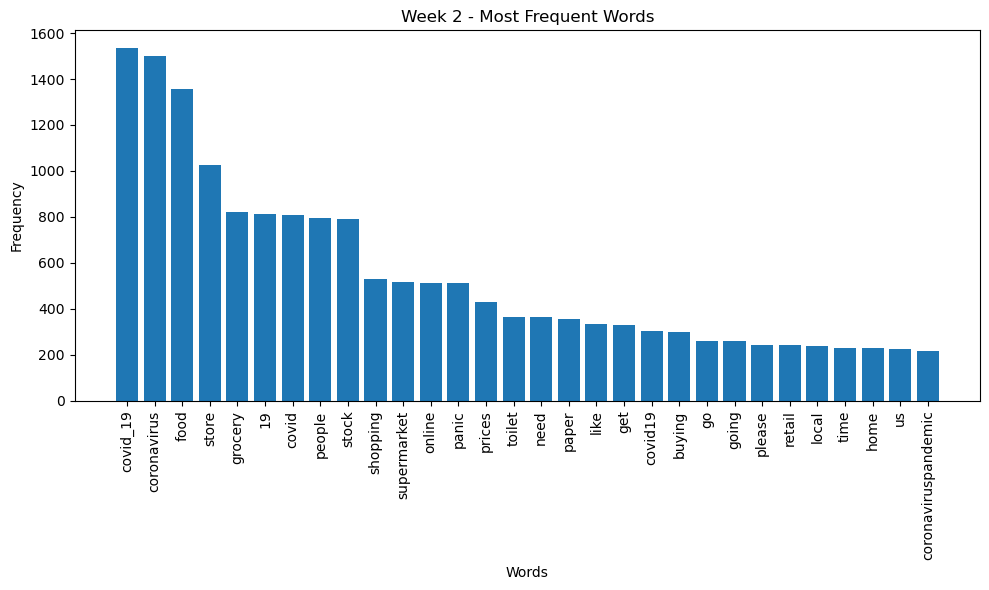

In [102]:
import matplotlib.pyplot as plt

# Define the top 30 words and their frequencies
words = [
    'covid_19', 'coronavirus', 'food', 'store', 'grocery', '19', 'covid', 'people', 'stock', 'shopping',
    'supermarket', 'online', 'panic', 'prices', 'toilet', 'need', 'paper', 'like', 'get', 'covid19',
    'buying', 'go', 'going', 'please', 'retail', 'local', 'time', 'home', 'us', 'coronaviruspandemic'
]
frequencies = [
    1535, 1500, 1358, 1026, 820, 812, 810, 794, 791, 528,
    517, 514, 512, 429, 366, 365, 358, 333, 330, 303,
    301, 262, 261, 244, 244, 240, 230, 228, 227, 219
]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Week 2 - Most Frequent Words')
plt.tight_layout()
plt.show()

# Analysis

#####       There were still many interesting results surrounding the shutdown. In analyzing the week 1 subset we created from dates March 2, 2023 - March 8, 2023 covid19, we see a very low frequency of  words surrounding Covid 19. Based on, the Most Frequent Words  (code line 21) “coronavirus” appeared 25, “prices” appeared 10 times. The first topic’s theme consists of the coronavirus causing safety concerns in supermarkets  and consumer needs for hand sanitizer. This theme has very little frequency to go on. Topic 2 theme is prices causing panic in gas and safety for places like Costco. These topics indicate concern facing safety and economic stability. Overall there is little concern for covid in general due to low occurrence of many of these words. We are definitely looking at the week covid 19 entered a digital space on Twitter. As these topics down the road attract national attention.  Referencing code line 60 which is a bar graph breaking down Topic 1 and Topic 2, based on color to analyze the word's relevance to Covid 19.  Topic one represents the theme of panic facing the coronavirus, on safety supermarkets, pshopping from in store to online. This is a very self centered theme generated really highlighting an important issue over safety in public but based on the words generated I would analyze topic 1 as people focusing on capalistic needs over some of the  bigger issues at hand facing covid. Topic 2 is just a more detailed theme of items people were scared of not having such as toilet paper, water, stock, prices and sanitizer. At the time these were very important issues receiving news recognition and so forth. However, the frequency of most of these words are below 50 and based on frequency percentage are below 20%. I think the data being so small for topic 1 merely for the newness it was affecting the United States this topic overall wasn’t something many were paying attention to.


# Results

### These are the results of week 1 topic modeling:
### Topic #1: Coronavirus prices covid_19 food buying and many last sold month facemasks panic gas like sell may
### Topic #2: Coronavirus covid 19 sanitizer panic free hand costco seats stock safety grocery food supplies supermarket
